<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Random-forest-for-email-spam-classifier" data-toc-modified-id="1.-Random-forest-for-email-spam-classifier-1">1. Random forest for email spam classifier</a></span><ul class="toc-item"><li><span><a href="#1.0.-Initial-setup" data-toc-modified-id="1.0.-Initial-setup-1.1">1.0. Initial setup</a></span></li><li><span><a href="#1.1.-Data-characteristics" data-toc-modified-id="1.1.-Data-characteristics-1.2">1.1. Data characteristics</a></span></li><li><span><a href="#1.2.-Classification-tree" data-toc-modified-id="1.2.-Classification-tree-1.3">1.2. Classification tree</a></span></li><li><span><a href="#1.3.-Random-forest" data-toc-modified-id="1.3.-Random-forest-1.4">1.3. Random forest</a></span></li></ul></li><li><span><a href="#2.-Nonlinear-regression-and-cross-validation" data-toc-modified-id="2.-Nonlinear-regression-and-cross-validation-2">2. Nonlinear regression and cross-validation</a></span><ul class="toc-item"><li><span><a href="#2.0.-Initial-setup" data-toc-modified-id="2.0.-Initial-setup-2.1">2.0. Initial setup</a></span></li><li><span><a href="#2.1.-Linear-regression" data-toc-modified-id="2.1.-Linear-regression-2.2">2.1. Linear regression</a></span></li><li><span><a href="#2.2.-Nonlinear-regression" data-toc-modified-id="2.2.-Nonlinear-regression-2.3">2.2. Nonlinear regression</a></span></li><li><span><a href="#2.3.-5-fold-cross-validation" data-toc-modified-id="2.3.-5-fold-cross-validation-2.4">2.3. 5-fold cross-validation</a></span></li><li><span><a href="#2.4.-Prediction" data-toc-modified-id="2.4.-Prediction-2.5">2.4. Prediction</a></span></li></ul></li></ul></div>

# 1. Random forest for email spam classifier

## 1.0. Initial setup

In [1]:
# Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz
import warnings

np.random.seed(503)
warnings.simplefilter('ignore')

In [2]:
spambase = pd.read_csv('spambase.data', sep=',', header=None)
spambase.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
X = spambase.iloc[:, :-1]
y = spambase.iloc[:, -1]  # Last column

## 1.1. Data characteristics

In [4]:
print(f"Number of spam emails: {np.where(y == 1)[0].shape[0]}")
print(f"Number of non-spam emails: {np.where(y == 0)[0].shape[0]}")
print(f"Number of data points: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

Number of spam emails: 1813
Number of non-spam emails: 2788
Number of data points: 4601
Number of features: 57


## 1.2. Classification tree

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

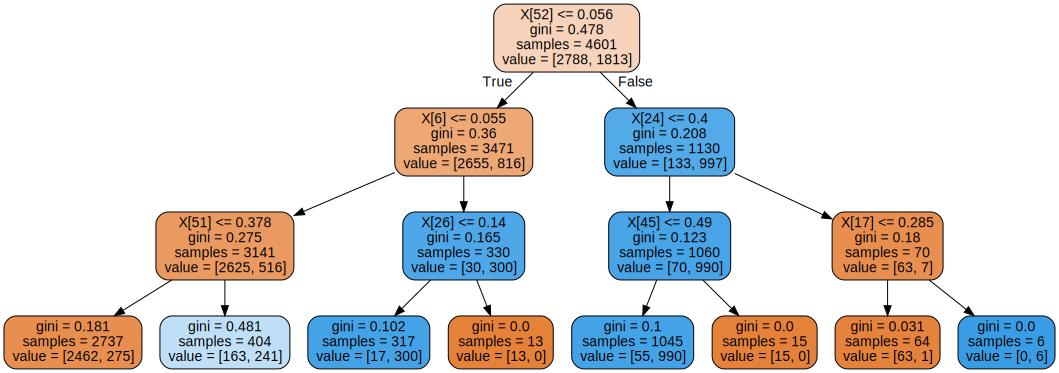

In [6]:
# Fit decision tree
clf_CART = DecisionTreeClassifier(max_depth=3, random_state=503)
clf_CART.fit(X, y)

# Generate tree graphviz
graph_CART = graphviz.Source(
    export_graphviz(clf_CART, out_file=None,
                    filled=True, rounded=True)
)

# Generate PNG and display tree
graph_CART.format = 'png'
graph_CART.render('1.2', view=False)
graph_CART

## 1.3. Random forest

In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [8]:
# Partition data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=503)

# List of tree sizes (max depths) to try
tree_sizes = list(range(1, 16))

In [9]:
aucs_CART = []

# Fit decision tree on training data
for tree_size in tree_sizes:
    clf_CART = DecisionTreeClassifier(max_depth=tree_size, random_state=503)
    clf_CART.fit(X_train, y_train)
    
    # Add AUC
    aucs_CART.append(
        roc_auc_score(y_test, clf_CART.predict(X_test))
    )

In [10]:
aucs_RF = []

# Fit random forest on training data
for tree_size in tree_sizes:
    clf_RF = RandomForestClassifier(max_depth=tree_size, random_state=503)
    clf_RF.fit(X_train, y_train)
    
    aucs_RF.append(
        roc_auc_score(y_test, clf_RF.predict(X_test))
    )

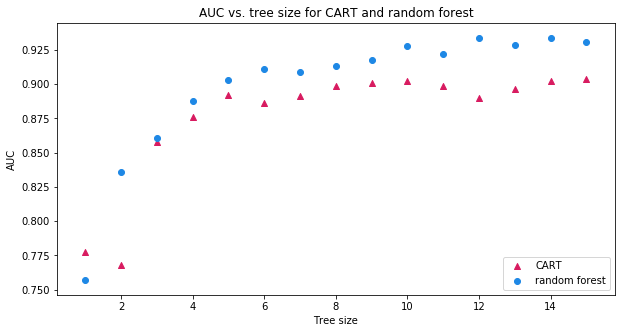

In [11]:
# Plot AUCs
fig = plt.figure(figsize=(10, 5))
scatter_CART = plt.scatter(tree_sizes, aucs_CART, c='#D81B60', marker='^')
scatter_RF = plt.scatter(tree_sizes, aucs_RF, c='#1E88E5', marker='o')
plt.xlabel("Tree size")
plt.ylabel("AUC")
plt.title("AUC vs. tree size for CART and random forest")
plt.legend([scatter_CART, scatter_RF], ['CART', 'random forest'], loc='lower right')
plt.show()

# 2. Nonlinear regression and cross-validation

## 2.0. Initial setup

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
copper = np.loadtxt('copper-new.txt')
copper[:5]

array([[  0.591,  24.41 ],
       [  4.703,  54.98 ],
       [  9.47 ,  89.57 ],
       [ 11.615, 114.26 ],
       [ 12.97 , 133.61 ]])

In [14]:
X = copper[:, 1].reshape(-1, 1)  # Reshape for use in sklearn's LinearRegression
y = copper[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=503)

## 2.1. Linear regression

In [15]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)

print(f"Intercept: {model_LR.intercept_}")
print(f"Coefficient: {model_LR.coef_[0]}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")

Intercept: 7.901750314942486
Coefficient: 0.0200048175308241
Mean squared error: 16.823695600917066


## 2.2. Nonlinear regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

In [17]:
# For each degree from 1 to 10, fit a linear regression model on training set, and calculate MSE on test set
degrees = list(range(1, 11))
mses = []

for degree in degrees:
    # Use make_pipeline to apply a transform and fit
    pipe_LR = Pipeline(steps=[
        ('poly', PolynomialFeatures(degree, include_bias=False)),
        ('linear', LinearRegression())
    ])
    pipe_LR.fit(X_train, y_train)
    
    y_pred = pipe_LR.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    mses.append(mse)

In [18]:
# Identify degree with lowest MSE
best_degree = degrees[np.argmin(mses)]
print(f"Best_degree: {best_degree}")
print(f"Lowest test MSE: {min(mses)}")

Best_degree: 5
Lowest test MSE: 0.08623631579056872


In [19]:
# Fit ridge regression model using best degree
pipe_ridge = Pipeline(steps=[
    ('poly', PolynomialFeatures(best_degree, include_bias=False)),
    ('ridge', Ridge(fit_intercept=True, normalize=True, random_state=503))
])
pipe_ridge.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=5, include_bias=False,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=True, random_state=503,
                       solver='auto', tol=0.001))],
         verbose=False)

## 2.3. 5-fold cross-validation

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
# Set up parameter grid for lambda/alpha values
param_grid = {'ridge__alpha': list(np.arange(0.1, 10.1, 0.1))}

In [22]:
# Fit ridge regression model using best degree from 2.2, with parameterized alpha
ridge_search = GridSearchCV(pipe_ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_search.fit(X_train, y_train)

# Show best score and parameter
print(f"Best MSE: {-1*ridge_search.best_score_}")
print(f"Best alpha (lambda): {ridge_search.best_params_}")

Best MSE: 7.422835492498817
Best alpha (lambda): {'ridge__alpha': 0.1}


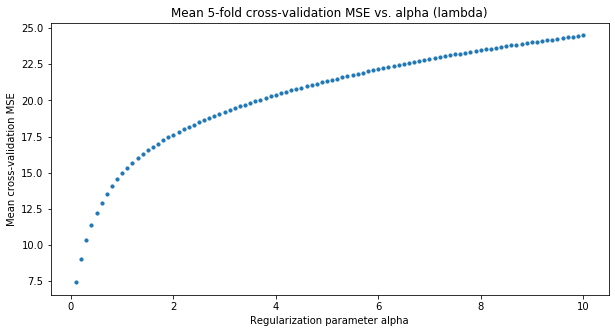

In [23]:
# Plot results
fig  = plt.figure(figsize=(10, 5))
plt.scatter(param_grid['ridge__alpha'],
            -1*ridge_search.cv_results_['mean_test_score'],  # Un-negate the value to plot actual MSE
            s=10)
plt.xlabel("Regularization parameter alpha")
plt.ylabel("Mean cross-validation MSE")
plt.title("Mean 5-fold cross-validation MSE vs. alpha (lambda)")
plt.show()

## 2.4. Prediction

In [24]:
new_x = np.array([[400]])

# Predict using original linear regression model from 2.1
print(f"Linear regression prediction: {model_LR.predict(new_x)[0]}")

# Predict using best estimator from GridSearchCV
print(f"Polynomial regression prediction: {ridge_search.best_estimator_.predict(new_x)[0]}")

Linear regression prediction: 15.903677327272126
Polynomial regression prediction: 16.652570092330933
